# Nudging on e-Commerce sites

I came out of reading Dan Ariely’s Predictably Irrational: The Hidden Forces That Shape Our Decision with a fascination for his pricing experiments. The Sunk Cost Fallacy perfectly described why the ‘tiny scratch’ on my pre-loved fitness tracker was seen by a buyer as a ‘glaring flaw’. I wondered what then would be the best way to nudge consumer behaviour in the right direction. 

Two methods were apparent to me: **Anchoring**, and **Feedback**. 

**Anchoring**. While some of the more astute users might do a search for the price of their ‘competition’, a majority of users set prices on their own inherent measure of values that we already established is inherently flawed (see ‘sunk cost fallacy’). Would we be motivated to reduce our prices if we were told that similar items were priced much lower than we had originally set? 

**Feedback**. How quickly we manage to sell our items probably isn’t something that is top-of-mind to most casual users. What if someone gave a timely reminder that no one had responded to our ad for 31 days? Would we be motivated to reduce our price, or to stick to our guts? 


In [81]:
time = pd.read_csv('time_vs_social.csv')

time.head()

,Condition,User ID,Time (UTC),Survey Completion,Publisher Category,Gender,Age,Geography,Weight,Question #1 Synonym Group,Price,Response_Time
0,Time,1125299670,9/7/17 22:45,Complete,News,Male,65+,US-MIDWEST-MO-Florissant,1.129179,39.5,39.5,80679
1,Time,1238570858,11/7/17 5:01,Complete,Other,Female,45-54,US-MIDWEST-ND-Mayville,1.273988,35.0,35.0,10827
2,Time,1426530800,9/7/17 20:07,Complete,News,Male,35-44,US-MIDWEST-MI-DeWitt,0.000008,35.0,35.0,32060
3,Time,472546757,10/7/17 1:02,Complete,News,Male,35-44,US-SOUTH-TN-Nashville,0.019379,30.0,30.0,22244
4,Time,575305722,9/7/17 4:43,Complete,News,Male,35-44,US-MIDWEST-IA-Jesup,0.000008,20.0,20.0,25568


In [82]:
time_data = time[time['Condition'] == "Time"]
time_data1 = time_data['Price']


time_data3 = time[time['Condition'] == "Social"]
time_data2 = time_data3['Price']


time_data3 = time_data3.rename(columns={'Response_Time': 'Response_Social'})
time_data = time_data.rename(columns={'Response_Time': 'Response_Time'})


In [83]:
time.groupby('Condition').mean()

,User ID,Weight,Question #1 Synonym Group,Price,Response_Time
Condition,,,,,
Social,1.378583e+09,0.9,25.849,25.849,33604.9
Time,7.504359e+08,0.9,32.450,32.450,37253.7


# Findings: T-Test

There was a significant difference between respondents who received the social anchoring condition, and the time feedback condition. Respondents who received the social anchoring condition were reduced their price to approximately 25.85 dollars. Respondents with the time feedback condition lowered their prices to only 32.45 dollars. This difference of 6.6 dollars was statistically significant.

In [84]:
twosample_results = scipy.stats.ttest_ind(time_data1, time_data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, file_id='twosample-table')


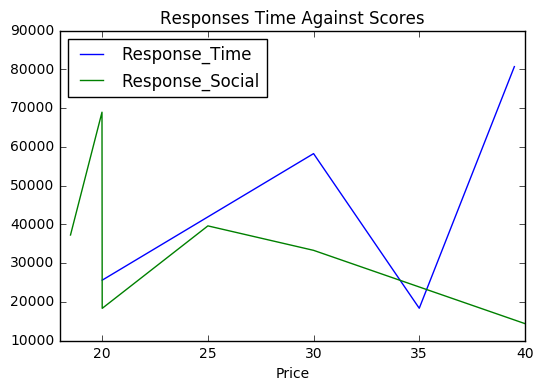

In [85]:
time_data.groupby('Price').Response_Time.mean().plot(xlim = (18, 40), legend = "test", title = "Responses Time Against Scores")
time_data3.groupby('Price').Response_Social.mean().plot(xlim = (18, 40), legend = "test")


# What is this trust thing?

> *“Today, what we have got is not money, what we have got is the trust of the people.”* **Jack Ma**

I was struck by what Jack Ma said after Alibaba was listed on the New York Stock Exchange. 
How could we build trust on an online classified site, where everyone knew that each other’s primary motive was profit-making? 

I decided to conduct a mini-behavioural insights study with randomised controlled trial to investigate if the content of reviews influenced how trustworthy a potential seller is perceived to be. 

# The world of difference two words makes

The experimental conditions were clear. In both cases, respondents received the following vignette, and were asked how trustworthy the prospective seller was. 

**Generic Vignette:** ![alt text](http://i67.tinypic.com/av0uti.png)
**Personal Vignette:** ![alt text](http://i68.tinypic.com/2h7i2d3.png)



In [77]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy
import scipy.stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

import plotly 
plotly.tools.set_credentials_file(username='dzldebby', api_key='WgKg4rOcNEdqQqKe3YVw')



#Condition 1 == Unpersonalised review, Condition 2 == Personalised Review 

df = pd.read_csv('RCT_Trust.csv')
df.head()

,Condition,User_ID,Time,Category,Gender,Age,Geography,Weight,Score,Response_Time
0,Impersonal,1042289417,7/7/17 0:36,Arts & Entertainment,Female,18-24,US-NORTHEAST-NY-New York,NaN,3,18841
1,Impersonal,1120370143,6/7/17 20:24,News,Male,35-44,US-SOUTH-DC-Washington,NaN,3,11200
2,Impersonal,1223171463,7/7/17 20:01,News,Female,18-24,US-NORTHEAST-MA-Taunton,NaN,3,58175
3,Impersonal,1274143080,7/7/17 12:54,News,Female,25-34,US-WEST-CO-Aspen,NaN,2,6311
4,Impersonal,1313061357,7/7/17 21:32,News,Male,35-44,US-MIDWEST-ND-Bismarck,NaN,3,22570


In [70]:
table = pd.pivot_table(df, values = 'Score', index = ['Condition', 'Gender'])
table

Condition   Gender
Impersonal  Female    2.466667
            Male      2.800000
Personal    Female    2.812500
            Male      3.714286
Name: Score, dtype: float64

In [78]:

data = df[df['Condition'] == "Impersonal"]
data1 = data['Score']

data3 = df[df['Condition'] == "Personal"]
data2 = data3['Score']


data3.rename(columns={'Response_Time': 'Personal_Time'}, inplace=True)
data.rename(columns={'Response_Time': 'Generic_Time'}, inplace=True)



In [72]:
df.groupby('Condition').mean()

,User_ID,Weight,Score,Response_Time
Condition,,,,
Impersonal,2.474463e+09,NaN,2.633333,17161.833333
Personal,1.069415e+09,NaN,3.233333,54065.400000


In [73]:
#histogram

x0 = data1
x1 = data2

trace1 = go.Histogram(
    x=x0,
    histnorm='count',
    name='Impersonal',
    marker=dict(
        color='#418cf4',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Personalised',
    marker=dict(
        color='#f4c242'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')



# Findings: T-Test

A simple t-test of comparison between means is sufficient in this case. Folks who received the Personal vignette (remember: just one different review – two additional words) were significantly likely to rate the seller as more trustworthy. That’s two words! 

In [74]:
#two-sample t-test

twosample_results = scipy.stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, file_id='twosample-table')


# Findings - Response Time

Interesting findings when it comes to respondents who rated the seller as ‘neutral’ – 3 out of 5. 

Respondents who received the Personal condition really struggled to do so, taking almost 1.75 minutes more than Generic folks to come to this conclusion. Did the addition of 2 words to the word count increase cognitive load so much? 
I suspect this might be cognitive dissonance: the Generic folks were ready to dismiss this prospective seller based on the lacklustre reviews, while Personal folks had this additional piece of information that added some points to the seller, but was ‘out-of-place’ in a landscape of otherwise bland reviews. 


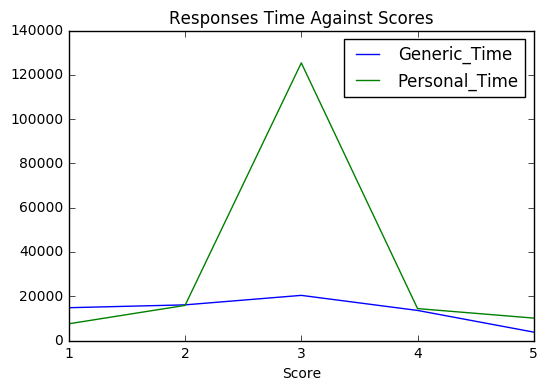

In [79]:
#graph of response time against scores. More details make it harder for people to reach a conclusion

data.groupby('Score').Generic_Time.mean().plot(xlim = (1, 5), xticks=(1,2,3,4,5), legend = "x", title = "Responses Time Against Scores")
data3.groupby('Score').Personal_Time.mean().plot(xlim = (1, 5), xticks=(1,2,3,4,5), legend = "x")
